In [1]:
# 1) Завантажити дані, вивести назви колонок і розмір датасета
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, zero_division=0))

from sklearn.model_selection import GridSearchCV

# Завантаження датасету
df = pd.read_csv('Stars.csv')

In [2]:
# Виведення назв колонок і розміру датасету
print("Назви колонок:", df.columns)
print("Розмір датасету:", df.shape)

Назви колонок: Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')
Розмір датасету: (240, 7)


In [19]:
# 2) Опрацювання пропусків
# Перевірка на наявність пропусків
# Пропуски відсутні, адже файл був опрацьований і тому цей крок можна пропустити, однак перевірити можна:
print("Пропуски в даних:\n", df.isnull().sum())

# Опрацювання пропусків для числових колонок
for col in ['Temperature', 'L', 'R', 'A_M']:
    df[col] = df[col].fillna(df[col].mean())

# Опрацювання пропусків для категоріальних колонок
df['Color'] = df['Color'].fillna(df['Color'].mode()[0])
df['Spectral_Class'] = df['Spectral_Class'].fillna(df['Spectral_Class'].mode()[0])

# Перевірка чи пропуски були заповнені
print("Пропуски після заповнення:\n", df.isnull().sum())


Пропуски в даних:
 Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64
Пропуски після заповнення:
 Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


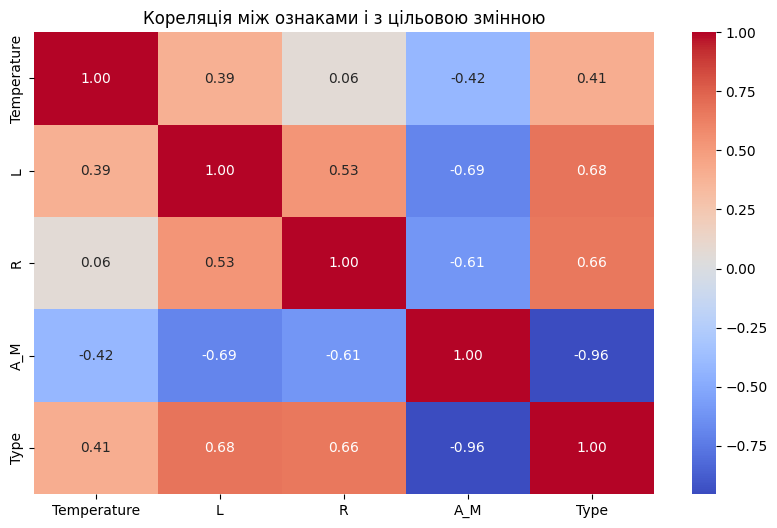

In [6]:
# 3) Візуалізація даних
# Кореляція між числовими ознаками та цільовою змінною
# Видаляємо нечислові стовпці для обчислення кореляції
df_numeric = df.drop(columns=['Color', 'Spectral_Class'])

# Розрахунок кореляції
correlation_matrix = df_numeric.corr()

# Побудова heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляція між ознаками і з цільовою змінною')
plt.show()


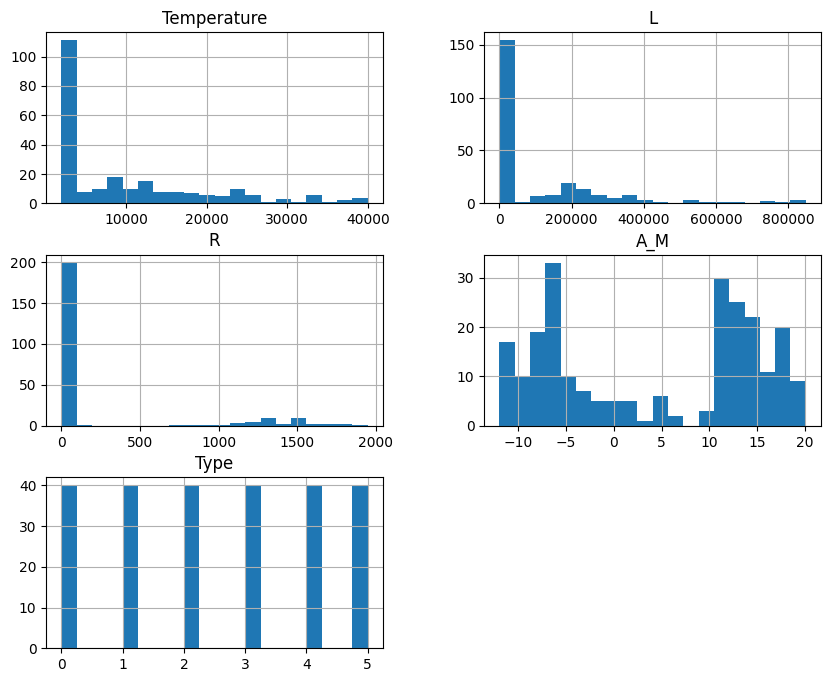

In [7]:
# Гістограми розподілу ознак
df_numeric.hist(figsize=(10, 8), bins=20)
plt.show()


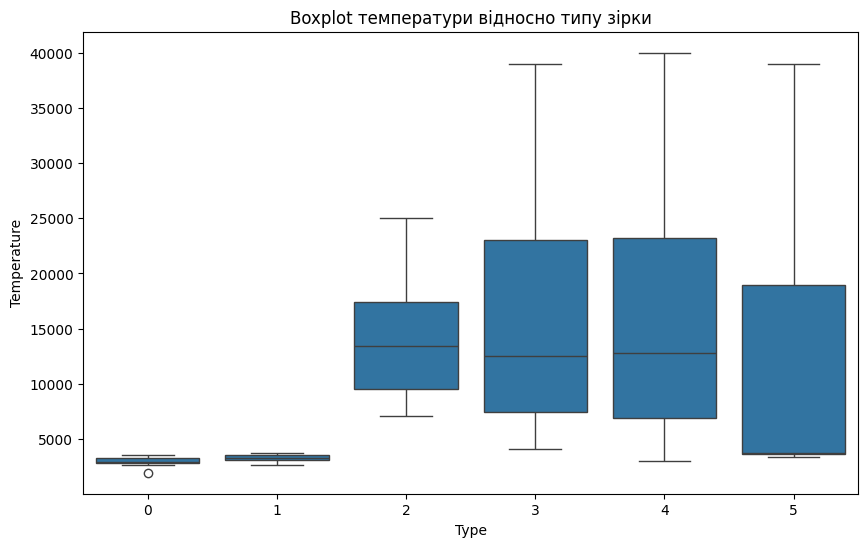

In [8]:
# Boxplot-и ознак відносно цільової змінної
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Temperature', data=df)
plt.title('Boxplot температури відносно типу зірки')
plt.show()

In [10]:
# 4) Нормалізація даних
X = df.drop(columns=['Type', 'Color', 'Spectral_Class'])
y = df['Type']

# Розбиття на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# 5) Навчання моделей
# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))

# Підбір параметра для kNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
print("Найкращий параметр для kNN:", grid_knn.best_params_)

KNN Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.98        72
weighted avg       0.99      0.99      0.99        72

KNN Confusion Matrix
[[14  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  9  1  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 15]]
Найкращий параметр для kNN: {'n_neighbors': 3}


In [13]:
# 5) Навчання моделей

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Decision Tree Confusion Matrix
[[14  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 15]]


In [14]:
# 5) Навчання моделей
# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))

# Підбір параметрів для SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)
print("Найкращі параметри для SVM:", grid_svm.best_params_)

SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.98        72
weighted avg       0.99      0.99      0.99        72

SVM Confusion Matrix
[[14  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  9  1  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 15]]
Найкращі параметри для SVM: {'C': 10, 'gamma': 1}


In [15]:
# 5) Навчання моделей
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Random Forest Confusion Matrix
[[14  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 15]]


In [17]:
# 5) Навчання моделей
# AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)

print("AdaBoost Classification Report")
print(classification_report(y_test, y_pred_ada))
print("AdaBoost Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ada))

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        10
           3       0.30      1.00      0.47        10
           4       0.00      0.00      0.00        11
           5       1.00      1.00      1.00        15

    accuracy                           0.68        72
   macro avg       0.55      0.67      0.58        72
weighted avg       0.58      0.68      0.61        72

AdaBoost Confusion Matrix
[[14  0  0  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0  0 15]]


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Loca